# Loading and Inspecting the data

In [329]:
!gdown 1K7q79Mw9azswVunSdwkov1F0duJNycdB

Downloading...
From: https://drive.google.com/uc?id=1K7q79Mw9azswVunSdwkov1F0duJNycdB
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 151MB/s]


In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
df = pd.read_csv('/content/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [333]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [334]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


#Basic EDA of categories

In [335]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##Type

In [336]:
df['type'].value_counts().reset_index()

,type,count
0,Movie,6131
1,TV Show,2676


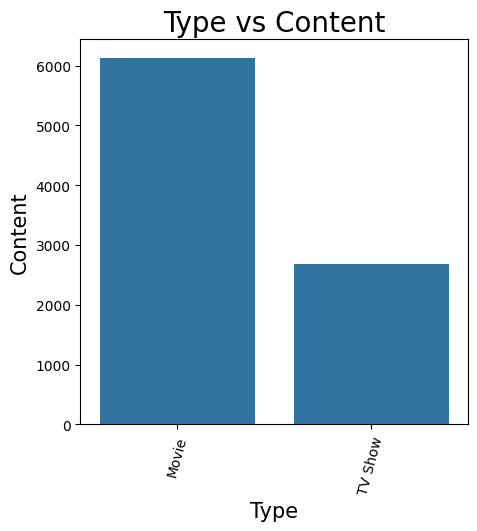

In [337]:
plt.figure(figsize=(5, 5))

plt.title('Type vs Content', fontsize=20)
sns.barplot(data=df['type'].value_counts().reset_index(), x='type', y='count')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Type', fontsize=15)
plt.ylabel('Content', fontsize=15)

plt.show()

##Director

In [338]:
df['director'].isna().sum()

np.int64(2634)

In [339]:
director = df['director'].dropna()
director = director.value_counts().reset_index()

In [340]:
director[:10]

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


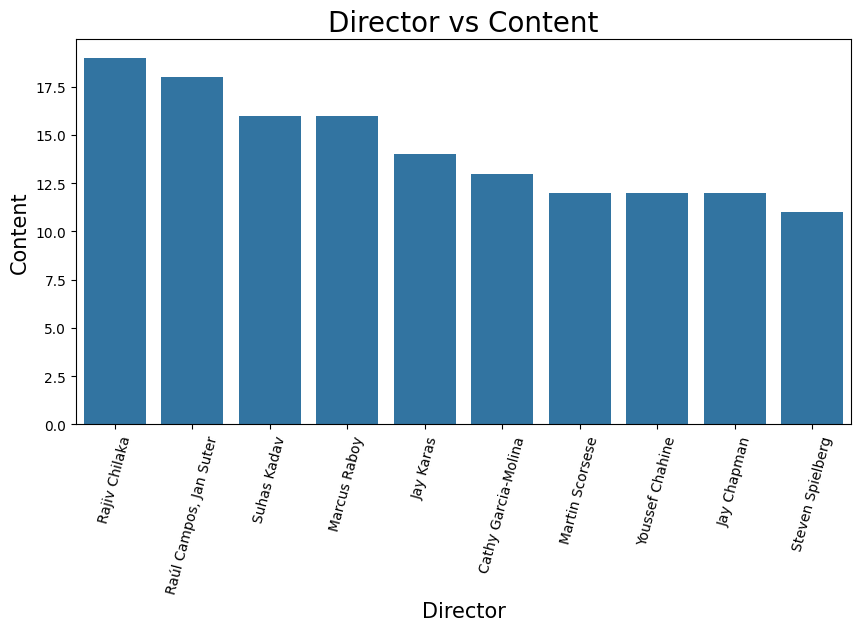

In [341]:
plt.figure(figsize=(10, 5))

plt.title('Director vs Content', fontsize=20)
sns.barplot(data=director[director['count']>10], x='director', y='count')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Director', fontsize=15)
plt.ylabel('Content', fontsize=15)

plt.show()

In [342]:
director.describe()

,count
count,4528.000000
mean,1.363295
std,1.083786
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,19.000000


##Cast

In [343]:
df['cast'].isna().sum()

np.int64(825)

In [344]:
cast = df['cast'].dropna()
cast = cast.str.split(', ')
cast = cast.explode('cast')
cast.head()

,cast
0,Ama Qamata
1,Khosi Ngema
2,Gail Mabalane
3,Thabang Molaba
4,Dillon Windvogel


In [345]:
cast = cast.value_counts().reset_index()
cast.head()

,cast,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Takahiro Sakurai,32
4,Naseeruddin Shah,32


In [346]:
cast.describe()

,count
count,36439.000000
mean,1.759818
std,1.886044
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,43.000000


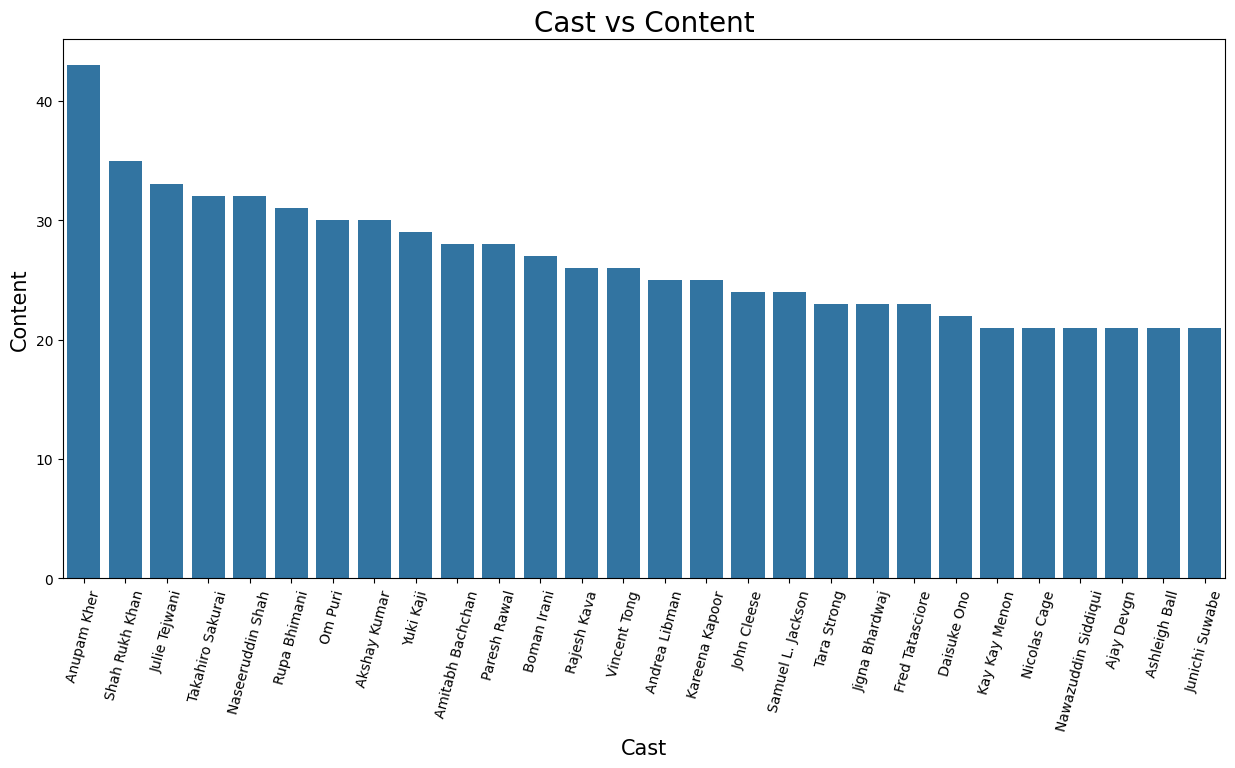

In [347]:
plt.figure(figsize=(15, 7))

plt.title('Cast vs Content', fontsize=20)
sns.barplot(data=cast[cast['count']>20], x='cast', y='count')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Cast', fontsize=15)
plt.ylabel('Content', fontsize=15)

plt.show()

##Country

In [348]:
df['country'].isna().sum()

np.int64(831)

In [349]:
country = df['country'].dropna()
country = country.str.split(', ')
country = country.explode('country')
country = country.value_counts().reset_index()

In [350]:
country.describe()

,count
count,127.000000
mean,78.850394
std,349.526575
min,1.000000
25%,1.000000
50%,5.000000
75%,38.500000
max,3689.000000


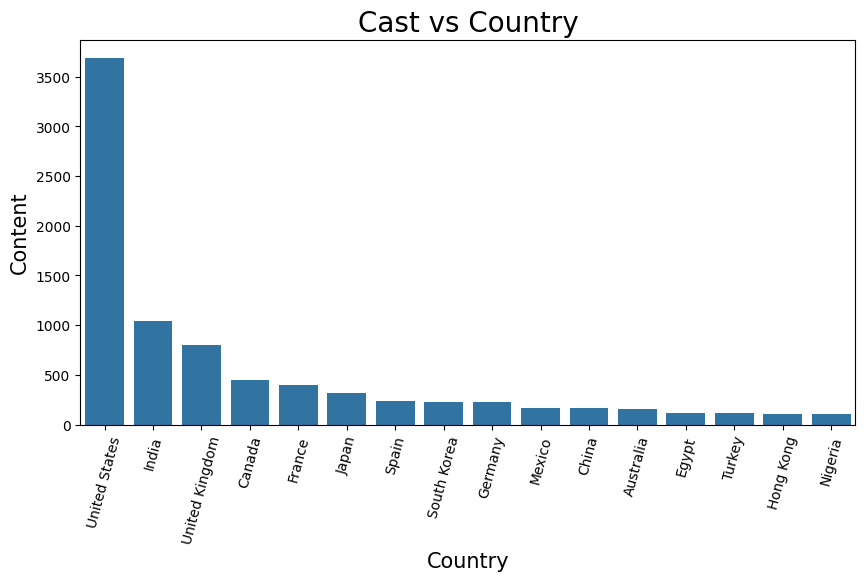

In [351]:
plt.figure(figsize=(10, 5))

plt.title('Cast vs Country', fontsize=20)
sns.barplot(data=country[country['count']>100], x='country', y='count')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Content', fontsize=15)

plt.show()

##Date_added

In [352]:
df['date_added'].isna().sum()

np.int64(10)

In [353]:
date_added = df['date_added'].dropna()
date_added.head()

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"


In [354]:
date_added = date_added.str.strip()
date_added = pd.to_datetime(date_added, format="%B %d, %Y", errors='coerce')
date_added

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24
...,...
8802,2019-11-20
8803,2019-07-01
8804,2019-11-01
8805,2020-01-11


In [355]:
year = date_added.dt.year
month = date_added.dt.month
day = date_added.dt.day

date_added = pd.DataFrame({'Year': year,
                           'Month': month,
                           'Day': day})

date_added.head()

,Year,Month,Day
0,2021,9,25
1,2021,9,24
2,2021,9,24
3,2021,9,24
4,2021,9,24


In [356]:
date_added.describe()

,Year,Month,Day
count,8797.000000,8797.000000,8797.000000
mean,2018.871888,6.654996,12.497329
std,1.574243,3.436554,9.887551
min,2008.000000,1.000000,1.000000
25%,2018.000000,4.000000,1.000000
50%,2019.000000,7.000000,13.000000
75%,2020.000000,10.000000,20.000000
max,2021.000000,12.000000,31.000000


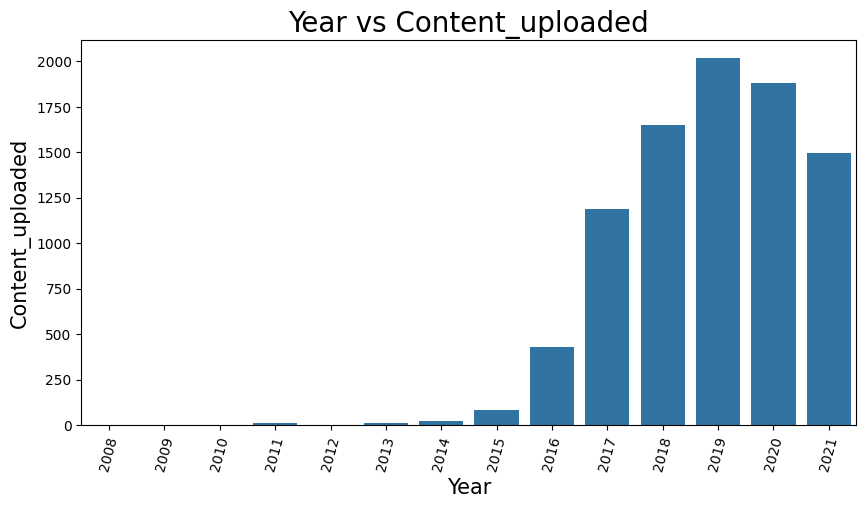

In [357]:
plt.figure(figsize=(10, 5))

plt.title('Year vs Content_uploaded', fontsize=20)
sns.countplot(data=date_added,  x='Year')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Content_uploaded', fontsize=15)

plt.show()

In [358]:
date_added[date_added['Year'] == 2021]['Month'].nunique()

9

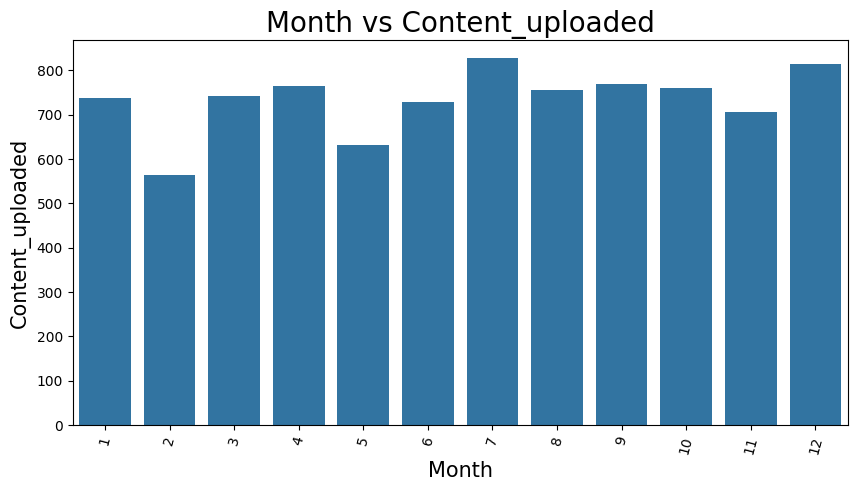

In [359]:
plt.figure(figsize=(10, 5))

plt.title('Month vs Content_uploaded', fontsize=20)
sns.countplot(data=date_added,  x='Month')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Content_uploaded', fontsize=15)

plt.show()

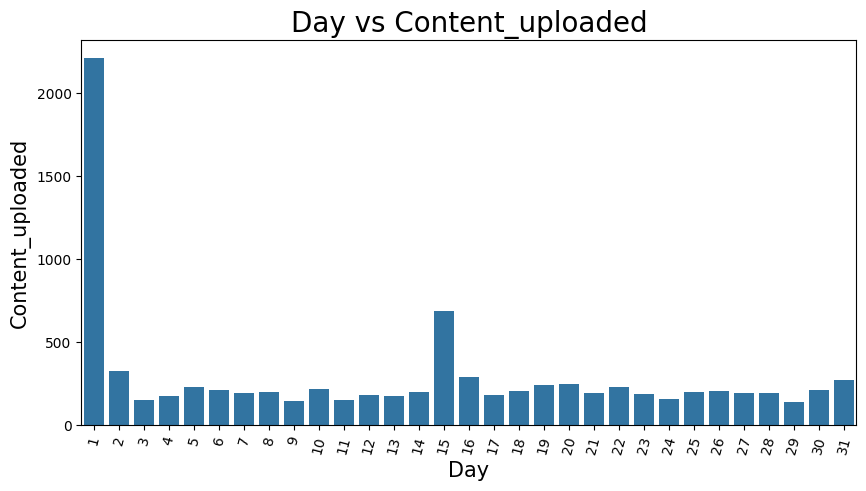

In [360]:
plt.figure(figsize=(10, 5))

plt.title('Day vs Content_uploaded', fontsize=20)
sns.countplot(data=date_added,  x='Day')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Content_uploaded', fontsize=15)

plt.show()

##Release_year

In [361]:
df['release_year'].isna().sum()

np.int64(0)

In [362]:
release_year = df['release_year'].value_counts().reset_index()
release_year.describe()

,release_year,count
count,74.000000,74.000000
mean,1983.581081,119.013514
std,23.157594,266.982042
min,1925.000000,1.000000
25%,1966.250000,3.000000
50%,1984.500000,12.500000
75%,2002.750000,58.500000
max,2021.000000,1147.000000


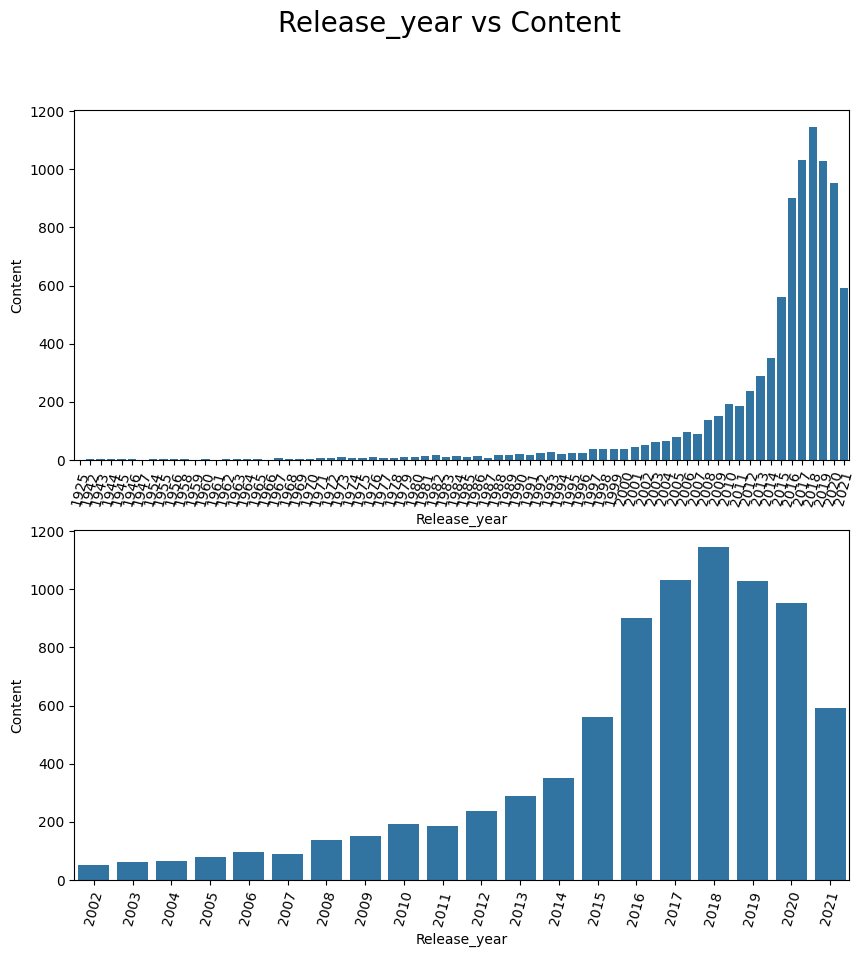

In [363]:
plt.figure(figsize=(10, 10)).suptitle('Release_year vs Content', fontsize=20)

plt.subplot(2, 1, 1)
sns.barplot(data=release_year, x='release_year', y='count')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Release_year', fontsize=10)
plt.ylabel('Content', fontsize=10)

plt.subplot(2, 1, 2)
sns.barplot(data=release_year[:20], x='release_year', y='count')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Release_year', fontsize=10)
plt.ylabel('Content', fontsize=10)

plt.show()

##Rating

In [364]:
df['rating'].isna().sum()

np.int64(4)

In [365]:
rating = df['rating'].dropna()
rating = rating.value_counts().reset_index()
rating.describe()

,count
count,17.000000
mean,517.823529
std,878.920875
min,1.000000
25%,3.000000
50%,220.000000
75%,490.000000
max,3207.000000


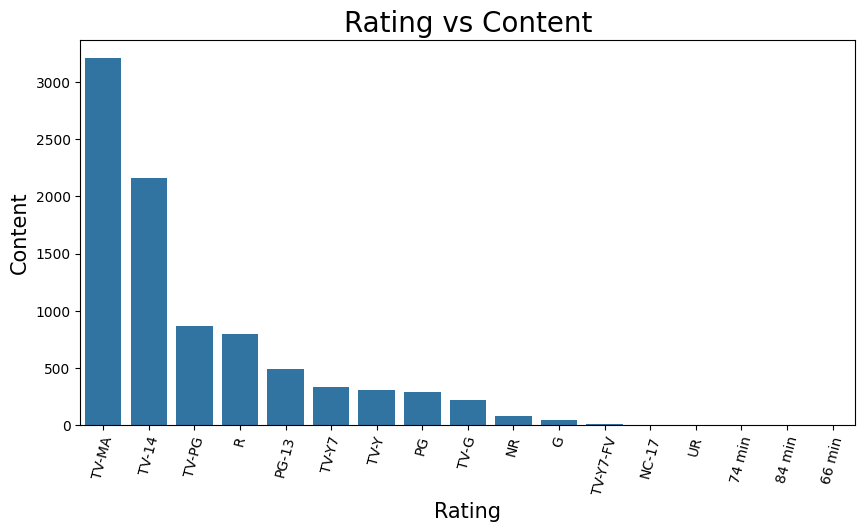

In [366]:
plt.figure(figsize=(10, 5))

plt.title('Rating vs Content', fontsize=20)
sns.barplot(data=rating,  x='rating', y='count')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Content', fontsize=15)

plt.show()

##Duration

In [367]:
df['duration'].isna().sum()

np.int64(3)

In [368]:
duration = df['duration'].dropna()

In [369]:
duration.head()

,duration
0,90 min
1,2 Seasons
2,1 Season
3,1 Season
4,2 Seasons


In [370]:
duration_min = duration[duration.str.contains('min')]

In [371]:
duration_season = duration[duration.str.contains('Season')]

In [372]:
duration_min = duration_min.str.replace('min', '').str.strip().astype(int)
duration_min.describe()

,duration
count,6128.000000
mean,99.577187
std,28.290593
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000


In [373]:
duration_season = duration_season.str.replace('Seasons', '').str.replace('Season','').str.strip().astype(int)
duration_season.describe()

,duration
count,2676.000000
mean,1.764948
std,1.582752
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17.000000


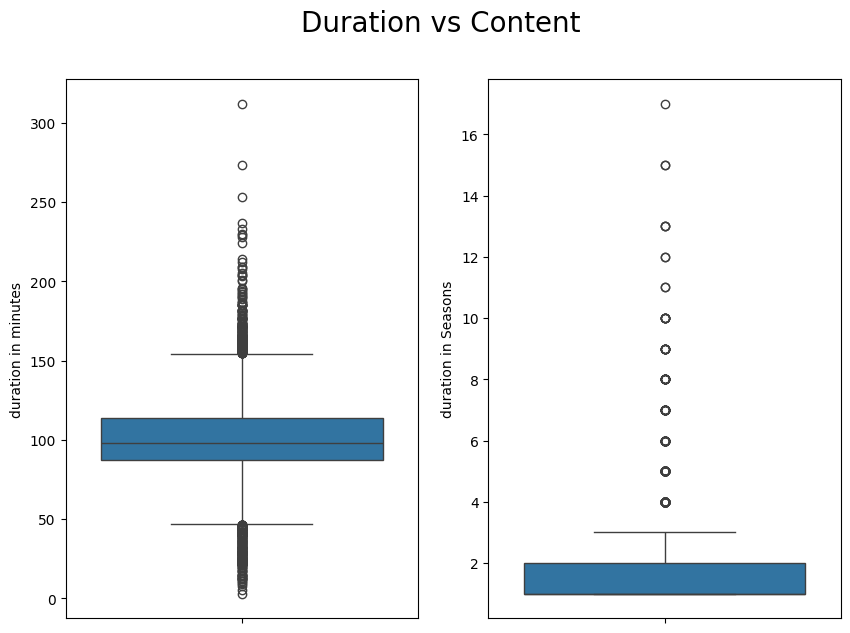

In [374]:
plt.figure(figsize=(10, 7)).suptitle('Duration vs Content', fontsize=20)

plt.subplot(1, 2, 1)
sns.boxplot(data=duration_min)
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('duration in minutes', fontsize=10)

plt.subplot(1, 2, 2)
sns.boxplot(data=duration_season)
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('duration in Seasons', fontsize=10)

plt.show()

##Listed_in

In [375]:
df['listed_in'].isna().sum()

np.int64(0)

In [376]:
genre = df['listed_in'].str.split(', ')
genre.head()

,listed_in
0,[Documentaries]
1,"[International TV Shows, TV Dramas, TV Mysteries]"
2,"[Crime TV Shows, International TV Shows, TV Ac..."
3,"[Docuseries, Reality TV]"
4,"[International TV Shows, Romantic TV Shows, TV..."


In [377]:
genre = genre.explode('listed_in')
genre = genre.value_counts().reset_index()
genre.head()

,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


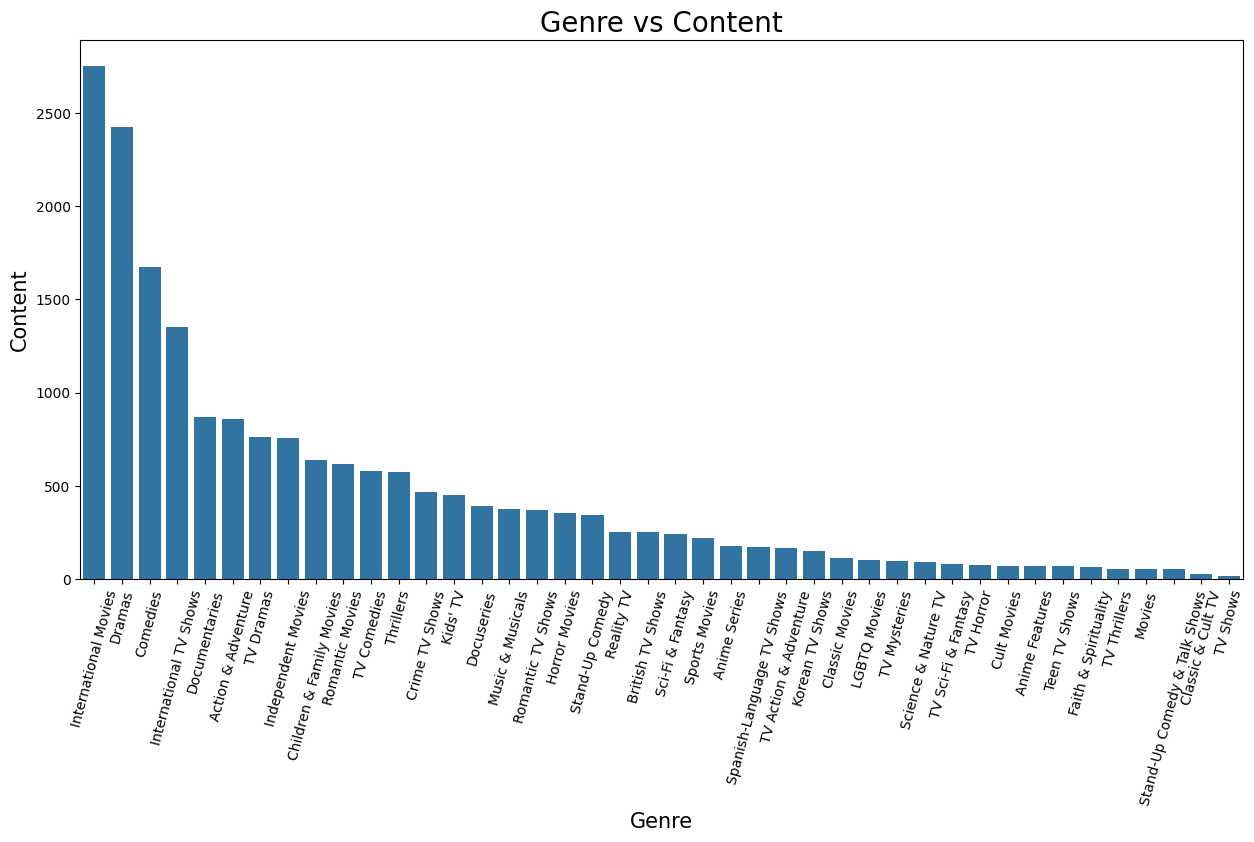

In [378]:
plt.figure(figsize=(15, 7))

plt.title('Genre vs Content', fontsize=20)
sns.barplot(data=genre,  x='listed_in', y='count')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Content', fontsize=15)

plt.show()

#TV Shows vs Movies

In [379]:
df['type'].isna().sum()

np.int64(0)

In [380]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [381]:
df['type'].nunique()

2

In [382]:
movie = df.loc[df['type'] == 'Movie']
tv_show = df.loc[df['type'] == 'TV Show']

In [383]:
yearly_movies = movie['release_year'].value_counts().reset_index()
yearly_movies.columns = ['year', 'movies_count']
yearly_movies.head()

,year,movies_count
0,2017,767
1,2018,767
2,2016,658
3,2019,633
4,2020,517


In [384]:
yearly_tv_shows = tv_show['release_year'].value_counts().reset_index()
yearly_tv_shows.columns = ['year', 'tv_shows_count']
yearly_tv_shows.head()

,year,tv_shows_count
0,2020,436
1,2019,397
2,2018,380
3,2021,315
4,2017,265


In [385]:
movie['release_year'].nunique()

73

In [386]:
tv_show['release_year'].nunique()

46

In [387]:
yearly_count = yearly_movies.merge(yearly_tv_shows, on='year', how='outer').fillna(0)
yearly_count.head()

,year,movies_count,tv_shows_count
0,1925,0.0,1.0
1,1942,2.0,0.0
2,1943,3.0,0.0
3,1944,3.0,0.0
4,1945,3.0,1.0


In [388]:
yearly_count['movie_percentage'] = (yearly_count['movies_count'] / (yearly_count['tv_shows_count'] + yearly_count['movies_count'])) * 100
yearly_count['tv_show_percentage'] = (yearly_count['tv_shows_count'] / (yearly_count['movies_count'] + yearly_count['tv_shows_count'])) * 100
yearly_count.head()

,year,movies_count,tv_shows_count,movie_percentage,tv_show_percentage
0,1925,0.0,1.0,0.0,100.0
1,1942,2.0,0.0,100.0,0.0
2,1943,3.0,0.0,100.0,0.0
3,1944,3.0,0.0,100.0,0.0
4,1945,3.0,1.0,75.0,25.0


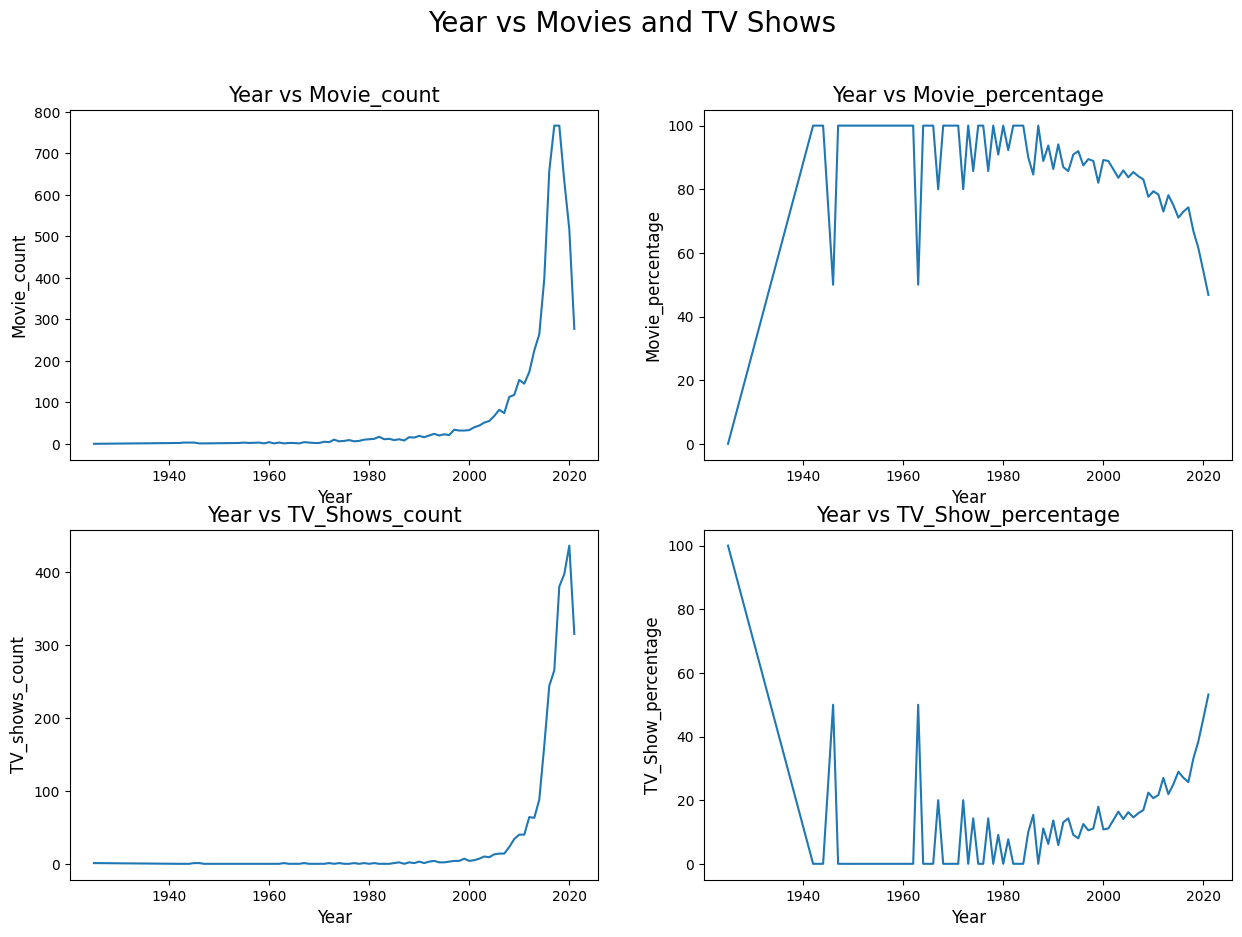

In [389]:
plt.figure(figsize=(15, 10)).suptitle('Year vs Movies and TV Shows', fontsize=20)

plt.subplot(2, 2, 1)
sns.lineplot(data=yearly_count, x='year', y='movies_count')
plt.title('Year vs Movie_count', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Movie_count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 2, 3)
sns.lineplot(data=yearly_count, x='year', y='tv_shows_count')
plt.title('Year vs TV_Shows_count', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('TV_shows_count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 2, 2)
sns.lineplot(data=yearly_count, x='year', y='movie_percentage')
plt.title('Year vs Movie_percentage', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Movie_percentage', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 2, 4)
sns.lineplot(data=yearly_count, x='year', y='tv_show_percentage')
plt.title('Year vs TV_Show_percentage', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('TV_Show_percentage', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Before 2000, Netflix had very few movies and TV shows in the dataset. To focus on more substantial years, we’ll filter for years with at least 100 titles.

In [390]:
yearly_count_100 = yearly_count.loc[(yearly_count['movies_count'] + yearly_count['tv_shows_count']) > 100]
yearly_count_100

,year,movies_count,tv_shows_count,movie_percentage,tv_show_percentage
60,2008,113.0,23.0,83.088235,16.911765
61,2009,118.0,34.0,77.631579,22.368421
62,2010,154.0,40.0,79.381443,20.618557
63,2011,145.0,40.0,78.378378,21.621622
64,2012,173.0,64.0,72.995781,27.004219
65,2013,225.0,63.0,78.125000,21.875000
66,2014,264.0,88.0,75.000000,25.000000
67,2015,398.0,162.0,71.071429,28.928571
68,2016,658.0,244.0,72.949002,27.050998
69,2017,767.0,265.0,74.321705,25.678295


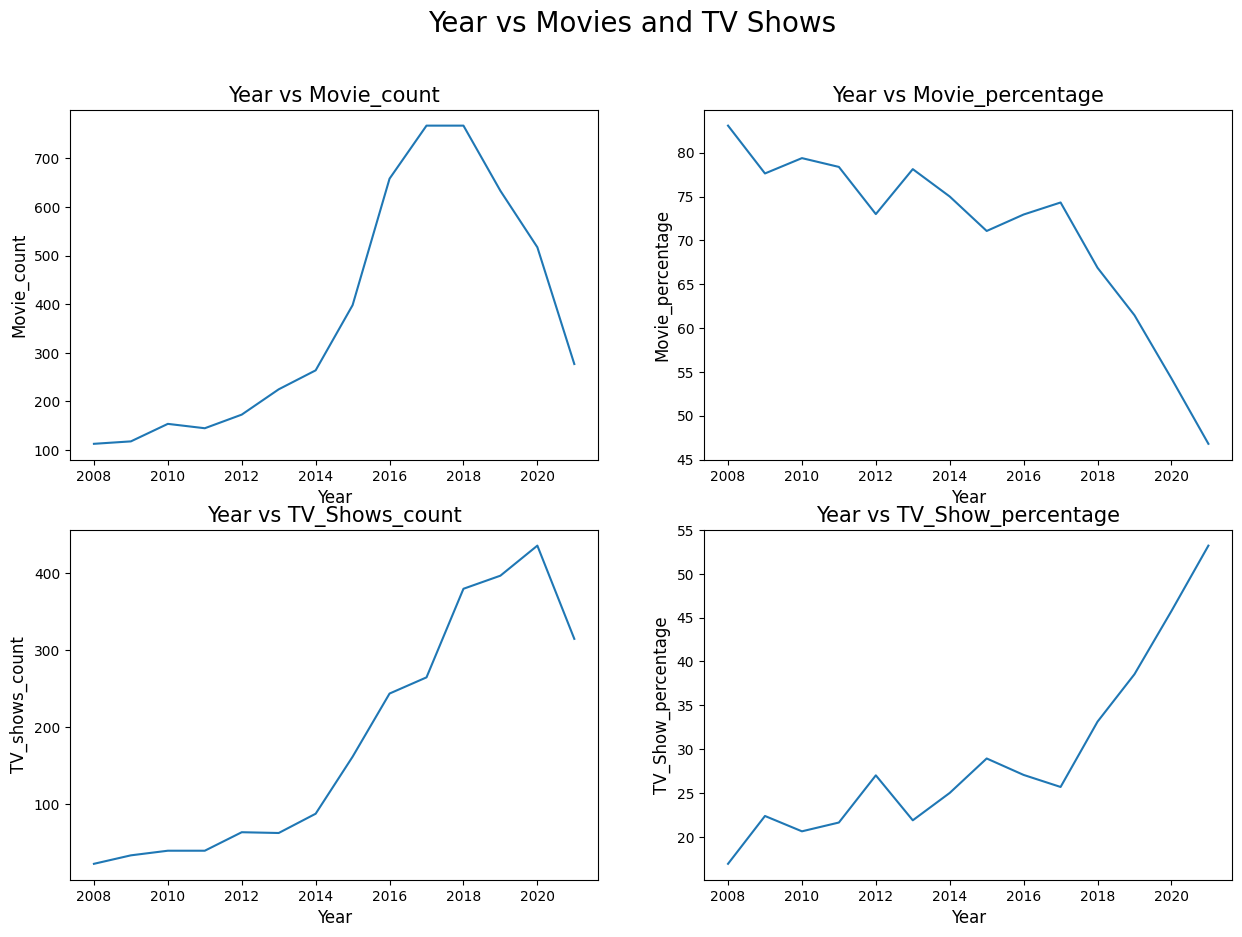

In [391]:
plt.figure(figsize=(15, 10)).suptitle('Year vs Movies and TV Shows', fontsize=20)

plt.subplot(2, 2, 1)
sns.lineplot(data=yearly_count_100, x='year', y='movies_count')
plt.title('Year vs Movie_count', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Movie_count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 2, 3)
sns.lineplot(data=yearly_count_100, x='year', y='tv_shows_count')
plt.title('Year vs TV_Shows_count', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('TV_shows_count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 2, 2)
sns.lineplot(data=yearly_count_100, x='year', y='movie_percentage')
plt.title('Year vs Movie_percentage', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Movie_percentage', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 2, 4)
sns.lineplot(data=yearly_count_100, x='year', y='tv_show_percentage')
plt.title('Year vs TV_Show_percentage', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('TV_Show_percentage', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

From the above data, we can see that while both movies and TV shows have increased in number, the share of TV shows within the overall content library has been rising much faster. This suggests that TV shows have gained significant popularity in recent years.

In [392]:
df['country'].isna().sum()

np.int64(831)

In [393]:
country = df.copy()
country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [394]:
country = country.loc[country['country'].dropna().index]

In [395]:
country['country'].isna().sum()

np.int64(0)

In [396]:
country['country'] = country['country'].str.split(', ')
country = country.explode('country')
country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [397]:
country_movies = country[country['type'] == 'Movie']
country_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",Jordan,"March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [398]:
country_movies = country_movies.groupby('country')['title'].nunique().sort_values(ascending=False).reset_index()
country_movies.head()

,country,title
0,United States,2751
1,India,962
2,United Kingdom,532
3,Canada,319
4,France,303


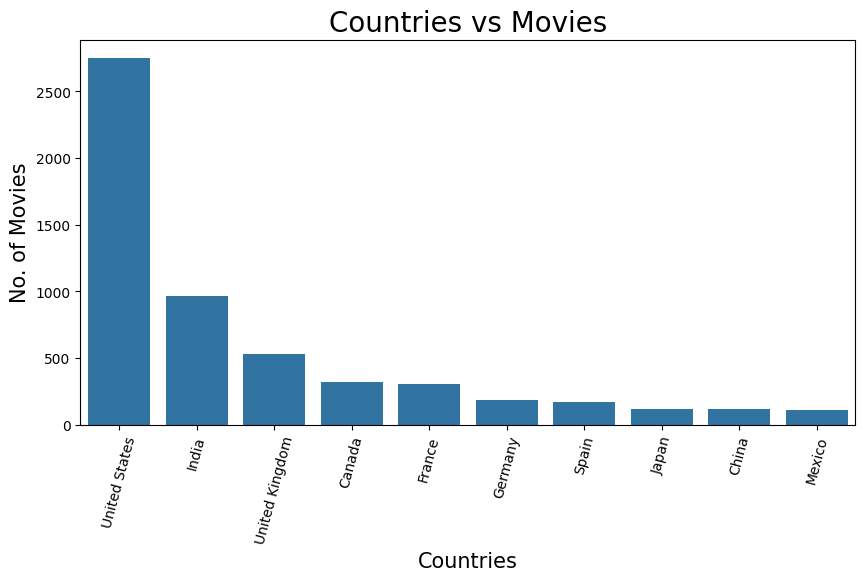

In [399]:
plt.figure(figsize=(10, 5))

plt.title('Countries vs Movies', fontsize=20)
sns.barplot(data=country_movies[:10], x='country', y='title')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('No. of Movies', fontsize=15)

plt.show()

In [400]:
country_tvshow = country[country['type'] == 'TV Show']
country_tvshow

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
17,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",United States,"September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",France,"September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",South Korea,"September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",Indonesia,"September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...


In [401]:
country_tvshow = country_tvshow.groupby('country')['title'].nunique().sort_values(ascending=False).reset_index()
country_tvshow.head()

,country,title
0,United States,938
1,United Kingdom,272
2,Japan,199
3,South Korea,170
4,Canada,126


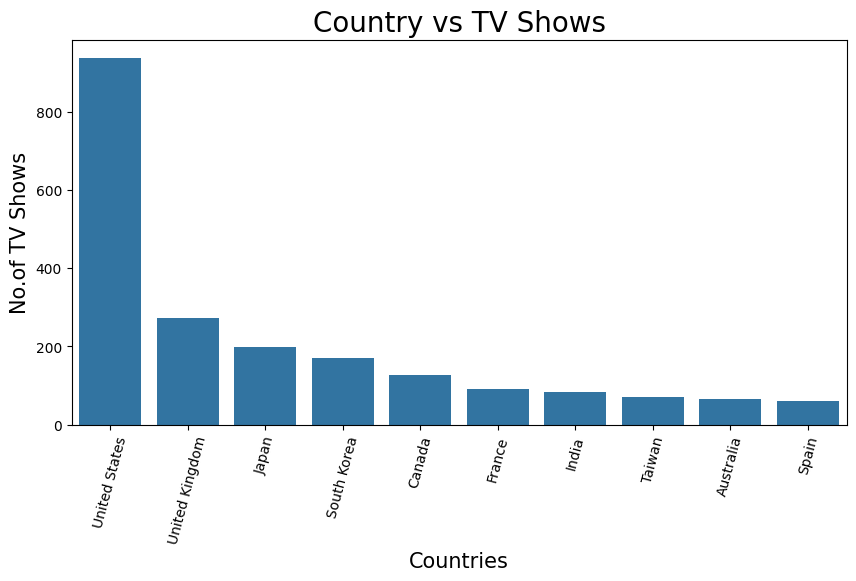

In [402]:
plt.figure(figsize=(10, 5))

plt.title('Country vs TV Shows', fontsize=20)
sns.barplot(data=country_tvshow[:10], x='country', y='title')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('No.of TV Shows', fontsize=15)

plt.show()

#Best time to launch Content

In [403]:
netflix = df.copy()
netflix.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [404]:
netflix = netflix.loc[netflix['date_added'].dropna().index]
netflix['date_added'].isna().sum()

np.int64(0)

In [405]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'].str.strip(), errors='coerce')

In [406]:
netflix['date_added'].info()

<class 'pandas.core.series.Series'>
Index: 8797 entries, 0 to 8806
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
8797 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 137.5 KB


In [407]:
netflix['Month'] = netflix['date_added'].dt.month
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9


In [408]:
netflix = netflix[['Month', 'type']]
netflix.head()

,Month,type
0,9,Movie
1,9,TV Show
2,9,TV Show
3,9,TV Show
4,9,TV Show


In [409]:
netflix = pd.get_dummies(netflix,'type',  dtype=int)
netflix.head()

,Month,type_Movie,type_TV Show
0,9,1,0
1,9,0,1
2,9,0,1
3,9,0,1
4,9,0,1


In [410]:
netflix = netflix.groupby('Month').agg(movies=('type_Movie', 'sum'),
                                       tv_shows=('type_TV Show', 'sum')).reset_index()

In [411]:
netflix

,Month,movies,tv_shows
0,1,546,192
1,2,382,181
2,3,529,213
3,4,550,214
4,5,439,193
5,6,492,236
6,7,565,262
7,8,519,236
8,9,519,251
9,10,545,215


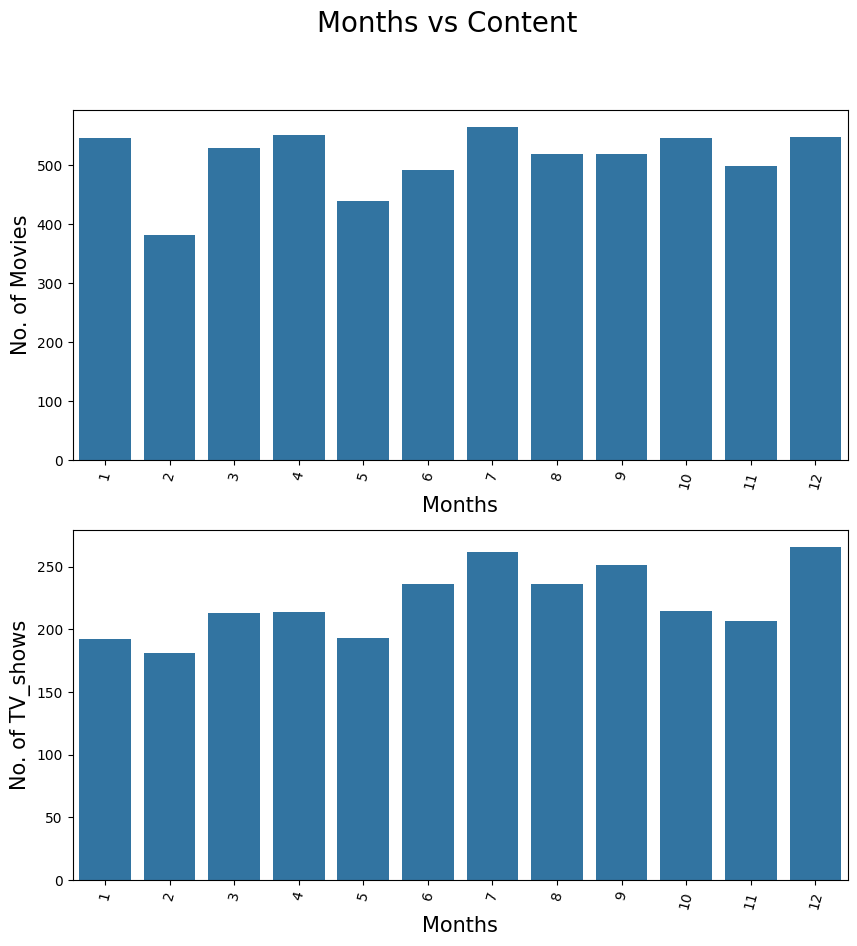

In [412]:
plt.figure(figsize=(10, 10)).suptitle('Months vs Content', fontsize=20)

plt.subplot(2, 1, 1)
sns.barplot(data=netflix, x='Month', y='movies')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Months', fontsize=15)
plt.ylabel('No. of Movies', fontsize=15)

plt.subplot(2, 1, 2)
sns.barplot(data=netflix, x='Month', y='tv_shows')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Months', fontsize=15)
plt.ylabel('No. of TV_shows', fontsize=15)

plt.show()

# Top 10 directors and actors

In [413]:
director = df.copy()
director = director.loc[director['director'].dropna().index]
director.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [414]:
director = pd.pivot_table(data=director,
               index='director',
               columns = 'type',
               values= 'title',
               aggfunc='nunique').fillna(0).reset_index()


In [415]:
director.head()

type,director,Movie,TV Show
0,A. L. Vijay,2.0,0.0
1,A. Raajdheep,1.0,0.0
2,A. Salaam,1.0,0.0
3,A.R. Murugadoss,2.0,0.0
4,Aadish Keluskar,1.0,0.0


In [416]:
top10_director_movies = director.sort_values(['Movie', 'TV Show'], ascending=False)[:10]
top10_director_movies

type,director,Movie,TV Show
3392,Rajiv Chilaka,19.0,0.0
3443,"Raúl Campos, Jan Suter",18.0,0.0
4046,Suhas Kadav,16.0,0.0
2598,Marcus Raboy,15.0,1.0
1790,Jay Karas,14.0,0.0
685,Cathy Garcia-Molina,13.0,0.0
1787,Jay Chapman,12.0,0.0
2671,Martin Scorsese,12.0,0.0
4480,Youssef Chahine,12.0,0.0
4020,Steven Spielberg,11.0,0.0


In [417]:
top10_director_tv_shows = director.sort_values(['TV Show', 'Movie'], ascending=False)[:10]
top10_director_tv_shows

type,director,Movie,TV Show
126,Alastair Fothergill,0.0,3.0
3957,Stan Lathan,2.0,2.0
1607,Hsu Fu-chun,0.0,2.0
1635,Iginio Straffi,0.0,2.0
2221,Ken Burns,0.0,2.0
3528,Rob Seidenglanz,0.0,2.0
3879,Shin Won-ho,0.0,2.0
2598,Marcus Raboy,15.0,1.0
3345,Quentin Tarantino,7.0,1.0
3649,Ryan Polito,7.0,1.0


In [418]:
director['combined'] = director['Movie'] + director['TV Show']
top10_director = director.sort_values('combined', ascending=False)[:10]
top10_director

type,director,Movie,TV Show,combined
3392,Rajiv Chilaka,19.0,0.0,19.0
3443,"Raúl Campos, Jan Suter",18.0,0.0,18.0
4046,Suhas Kadav,16.0,0.0,16.0
2598,Marcus Raboy,15.0,1.0,16.0
1790,Jay Karas,14.0,0.0,14.0
685,Cathy Garcia-Molina,13.0,0.0,13.0
4480,Youssef Chahine,12.0,0.0,12.0
2671,Martin Scorsese,12.0,0.0,12.0
1787,Jay Chapman,12.0,0.0,12.0
4020,Steven Spielberg,11.0,0.0,11.0


##Actors

In [419]:
cast = df.copy()
cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [420]:
cast['cast'] = cast['cast'].str.split(', ')
cast['cast']

,cast
0,NaN
1,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
3,NaN
4,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."
...,...
8802,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ..."
8803,NaN
8804,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,..."
8805,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M..."


In [421]:
cast = cast.loc[cast['cast'].dropna().index]
cast['cast']

,cast
1,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
4,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."
5,"[Kate Siegel, Zach Gilford, Hamish Linklater, ..."
6,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,..."
...,...
8801,"[Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri,..."
8802,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ..."
8804,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,..."
8805,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M..."


In [422]:
cast = cast.explode('cast')
cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [423]:
cast = cast[['cast', 'type', 'title']]

In [424]:
cast = pd.pivot_table(data=cast,
               index='cast',
               columns='type',
               values='title',
               aggfunc='nunique').fillna(0).reset_index()

In [425]:
top10_cast_movies = cast.sort_values(['Movie', 'TV Show'], ascending=False)[:10]
top10_cast_movies

type,cast,Movie,TV Show
2833,Anupam Kher,42.0,1.0
30489,Shah Rukh Khan,35.0,0.0
24215,Naseeruddin Shah,32.0,0.0
846,Akshay Kumar,30.0,0.0
25424,Om Puri,30.0,0.0
16697,Julie Tejwani,28.0,5.0
1774,Amitabh Bachchan,28.0,0.0
25782,Paresh Rawal,28.0,0.0
28974,Rupa Bhimani,27.0,4.0
4528,Boman Irani,27.0,0.0


In [426]:
top10_cast_tvshow = cast.sort_values(['TV Show', 'Movie'], ascending=False)[:10]
top10_cast_tvshow

type,cast,Movie,TV Show
32591,Takahiro Sakurai,7.0,25.0
35880,Yuki Kaji,10.0,19.0
7271,Daisuke Ono,5.0,17.0
16823,Junichi Suwabe,4.0,17.0
697,Ai Kayano,2.0,17.0
35861,Yuichi Nakamura,3.0,16.0
16760,Jun Fukuyama,1.0,15.0
35741,Yoshimasa Hosoya,1.0,15.0
7832,David Attenborough,6.0,14.0
34717,Vincent Tong,13.0,13.0


In [427]:
cast['combined'] = cast['Movie'] + cast['TV Show']
cast

type,cast,Movie,TV Show,combined
0,Jr.,1.0,1.0,2.0
1,"""Riley"" Lakdhar Dridi",1.0,0.0,1.0
2,'Najite Dede,1.0,1.0,2.0
3,2 Chainz,0.0,1.0,1.0
4,2Mex,1.0,0.0,1.0
...,...,...,...,...
36434,Şevket Çoruh,1.0,0.0,1.0
36435,Şinasi Yurtsever,3.0,0.0,3.0
36436,Şükran Ovalı,1.0,0.0,1.0
36437,Şükrü Özyıldız,1.0,1.0,2.0


In [428]:
top10_cast_combined = cast.sort_values('combined', ascending=False)[:10]
top10_cast_combined

type,cast,Movie,TV Show,combined
2833,Anupam Kher,42.0,1.0,43.0
30489,Shah Rukh Khan,35.0,0.0,35.0
16697,Julie Tejwani,28.0,5.0,33.0
24215,Naseeruddin Shah,32.0,0.0,32.0
32591,Takahiro Sakurai,7.0,25.0,32.0
28974,Rupa Bhimani,27.0,4.0,31.0
846,Akshay Kumar,30.0,0.0,30.0
25424,Om Puri,30.0,0.0,30.0
35880,Yuki Kaji,10.0,19.0,29.0
1774,Amitabh Bachchan,28.0,0.0,28.0


# How much time does Netflix take to add Movie

In [449]:
time = df[['date_added', 'release_year']]
time.dropna()

,date_added,release_year
0,"September 25, 2021",2020
1,"September 24, 2021",2021
2,"September 24, 2021",2021
3,"September 24, 2021",2021
4,"September 24, 2021",2021
...,...,...
8802,"November 20, 2019",2007
8803,"July 1, 2019",2018
8804,"November 1, 2019",2009
8805,"January 11, 2020",2006


In [450]:
time['date_added'] = pd.to_datetime(time['date_added'].str.strip(), errors='coerce')

/tmp/ipython-input-1268489828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['date_added'] = pd.to_datetime(time['date_added'].str.strip(), errors='coerce')


In [451]:
time['added_year'] = time['date_added'].dt.year
time.head()

/tmp/ipython-input-3324351681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['added_year'] = time['date_added'].dt.year


,date_added,release_year,added_year
0,2021-09-25,2020,2021.0
1,2021-09-24,2021,2021.0
2,2021-09-24,2021,2021.0
3,2021-09-24,2021,2021.0
4,2021-09-24,2021,2021.0


In [452]:
time.drop('date_added',axis=1, inplace=True)

/tmp/ipython-input-567582146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time.drop('date_added',axis=1, inplace=True)


In [453]:
time.head()

,release_year,added_year
0,2020,2021.0
1,2021,2021.0
2,2021,2021.0
3,2021,2021.0
4,2021,2021.0


In [455]:
time['year_diff'] = time['added_year'] - time['release_year']
time.head()

/tmp/ipython-input-4003170967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['year_diff'] = time['added_year'] - time['release_year']


,release_year,added_year,year_diff
0,2020,2021.0,1.0
1,2021,2021.0,0.0
2,2021,2021.0,0.0
3,2021,2021.0,0.0
4,2021,2021.0,0.0


In [460]:
time['year_diff'].describe()

,year_diff
count,8797.000000
mean,4.688417
std,8.786998
min,-3.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,93.000000


<Axes: xlabel='year_diff', ylabel='Count'>

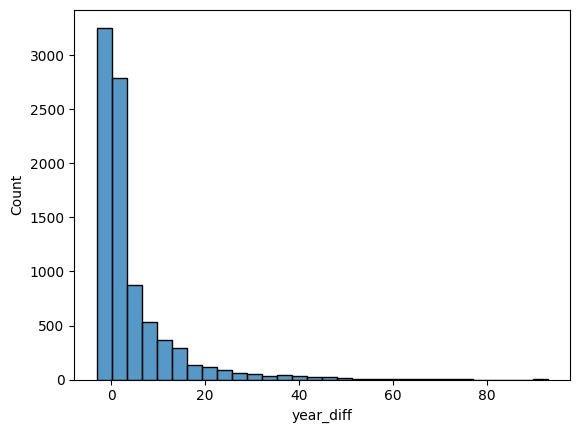

In [458]:
sns.histplot(data=time, x='year_diff', bins=30)

<Axes: ylabel='year_diff'>

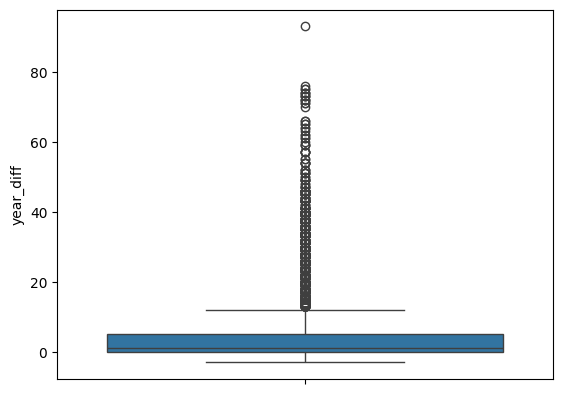

In [459]:
sns.boxplot(data=time['year_diff'])